In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('./dataset/house_price_train.csv', parse_dates=["Time"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553098 entries, 0 to 553097
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Id         553098 non-null  int64         
 1   Time       553098 non-null  datetime64[ns]
 2   City       553098 non-null  object        
 3   District   553098 non-null  object        
 4   Street     553098 non-null  object        
 5   Community  553098 non-null  object        
 6   Lon        553098 non-null  float64       
 7   Lat        553098 non-null  float64       
 8   #Floors    553098 non-null  int64         
 9   Floor      553098 non-null  object        
 10  #Rooms     553098 non-null  int64         
 11  #Halls     553098 non-null  int64         
 12  Orient     540144 non-null  object        
 13  Area       553098 non-null  float64       
 14  Price      553098 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(6)
memory usage: 

In [4]:
df.describe()

Id            Lon            Lat        #Floors  \
count  553098.000000  553098.000000  553098.000000  553098.000000   
mean   276548.500000     115.130411      34.102259      15.004410   
std    159665.783932       5.857565       5.296791      10.499972   
min         0.000000      88.843428      19.231379       0.000000   
25%    138274.250000     113.890427      30.651422       6.000000   
50%    276548.500000     116.431707      32.057509      11.000000   
75%    414822.750000     118.926912      39.689009      23.000000   
max    553097.000000     131.814595      46.772973     912.000000   

              #Rooms         #Halls           Area         Price  
count  553098.000000  553098.000000  553098.000000  5.530980e+05  
mean        2.212812       1.470060      87.040797  2.361677e+04  
std         0.842945       0.538393      38.122716  1.974780e+04  
min         0.000000       0.000000       1.000000  1.002000e+03  
25%         2.000000       1.000000      60.330000  9.993000e+03  
50%         2.000000       1.000000      82.610000  1.728600e+04  
75%         3.000000       2.000000     102.580000  3.105375e+04  
max         9.000000       7.000000    1276.000000  3.200000e+06

In [5]:
df.head()

Id       Time     City   District       Street               Community  \
0   0 2012-01-01  Beijing   Xi Cheng     Mu Xi Di  Fu Xing Men Wai Da Jie   
1   1 2012-01-02  Beijing  Tong Zhou     Bei Guan      Tian Ci Liang Yuan   
2   2 2012-01-03  Beijing  Tong Zhou     Bei Guan              Xi Lu Yuan   
3   3 2012-01-03  Beijing   Xi Cheng      Yue Tan         Xiao Si Dao Kou   
4   4 2012-01-03  Beijing  Zhao Yang  Shao Yao Ju  Shao Yao Ju 2 Hao Yuan   

          Lon        Lat  #Floors   Floor  #Rooms  #Halls Orient   Area  Price  
0  116.343908  39.910950       12  Middle       2       1      S  55.00  40909  
1  116.659029  39.928035        6  Middle       2       1     NS  93.59  14745  
2  116.659029  39.928035        6     Low       2       2     NS  85.32  11252  
3  116.351372  39.920587        6  Middle       1       1      E  41.30  33414  
4  116.449027  39.984813        6    High       2       1     NS  64.25  25370

In [6]:
df["Time"].min(), df["Time"].max()

(Timestamp('2012-01-01 00:00:00'), Timestamp('2018-03-31 00:00:00'))

In [20]:
df.isna().sum() / len(df) * 100

Id            0.00000
Time          0.00000
City          0.00000
District      0.00000
Street        0.00000
Community     0.00000
Lon           0.00000
Lat           0.00000
#Floors       0.00000
Floor         0.00000
#Rooms        0.00000
#Halls        0.00000
Orient        2.34208
Area          0.00000
Price         0.00000
year_month    0.00000
dtype: float64

In [8]:
px.bar(df["City"].value_counts())

<AxesSubplot:title={'center':'Mean Price'}, xlabel='year_month'>

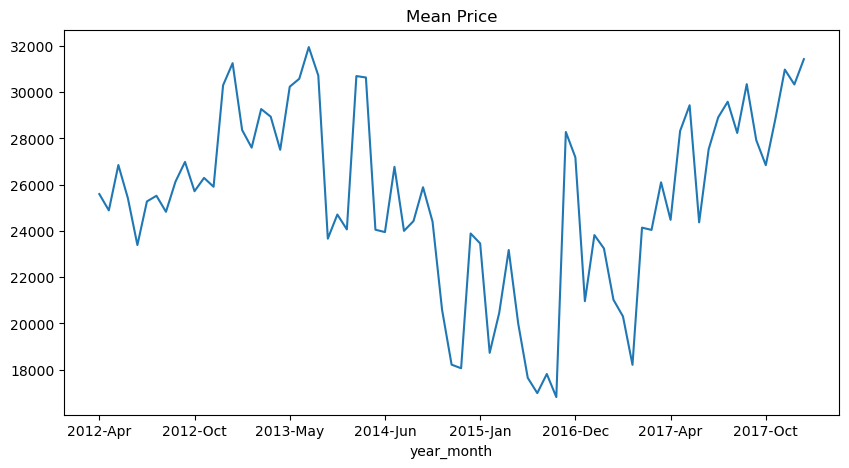

In [9]:
df["year_month"] = df["Time"].dt.strftime("%Y-%b")

fig, ax = plt.subplots(figsize=(10, 5))
df.groupby("year_month")["Price"].mean().plot(kind="line", ax=ax, title="Mean Price")

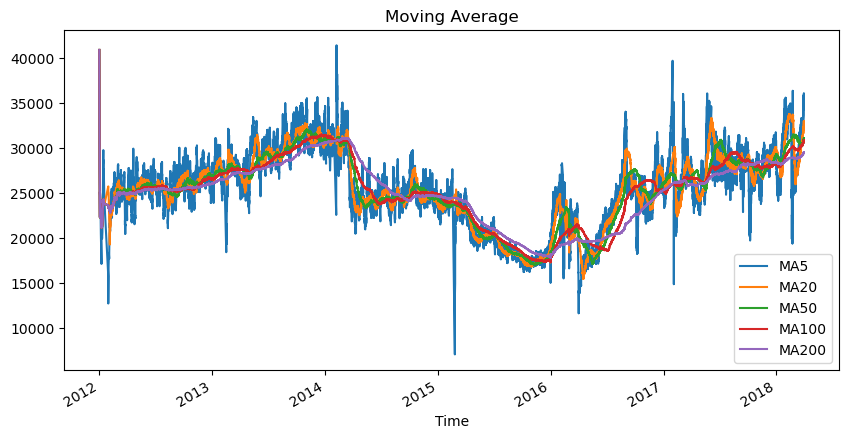

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

df_vis = df[["Time", "Price"]].copy()

df_vis["MA5"] = df_vis.rolling("5D", on="Time")["Price"].mean()
df_vis["MA20"] = df_vis.rolling("20D", on="Time")["Price"].mean()
df_vis["MA50"] = df_vis.rolling("50D", on="Time")["Price"].mean()
df_vis["MA100"] = df_vis.rolling("100D", on="Time")["Price"].mean()
df_vis["MA200"] = df_vis.rolling("200D", on="Time")["Price"].mean()

df_vis.plot(x="Time", y=["MA5", "MA20", "MA50", "MA100", "MA200"], ax=ax, title="Moving Average")
plt.show()

In [11]:
df_vis_sampled = df_vis.sample(frac=0.01, random_state=42).sort_values("Time")
px.line(df_vis_sampled, x="Time", y=["MA5", "MA20", "MA50", "MA100", "MA200"], title="Moving Average")

In [12]:
df_vis2 = df[["Time", "City", "Price"]].copy().set_index("Time")
df_vis2["MA20_Grouped"] = df_vis2.groupby("City")["Price"].transform(lambda x: x.rolling("20D").mean())
df_vis2

City  Price  MA20_Grouped
Time                                      
2012-01-01    Beijing  40909  40909.000000
2012-01-02    Beijing  14745  27827.000000
2012-01-03    Beijing  11252  22302.000000
2012-01-03    Beijing  33414  25080.000000
2012-01-03    Beijing  25370  25138.000000
...               ...    ...           ...
2018-03-31    Tianjin  17500  26427.712859
2018-03-31    Tianjin  24822  26425.710723
2018-03-31  Zhongqing  32386  29574.111111
2018-03-31  Zhongqing  33573  29716.928571
2018-03-31  Zhongqing  42667  30163.482759

[553098 rows x 3 columns]

In [13]:
df_years_count = df.groupby(df["Time"].dt.year)["Id"].count().reset_index()
px.bar(df_years_count, x="Time", y="Id")

In [14]:
df_pivot = df.pivot_table(index=["year_month"], columns=["City"], values=["Price"], aggfunc=np.mean).fillna(0)
df_pivot.to_excel("mean_price_train.xlsx")
df_pivot

Price                                                      \
City             Beijing Changchun      Changsha       Chengdu        Dalian   
year_month                                                                     
2012-Apr    25592.200000       0.0      0.000000      0.000000      0.000000   
2012-Aug    28326.362745       0.0      0.000000      0.000000  15402.000000   
2012-Dec    30316.377465       0.0      0.000000      0.000000  19727.000000   
2012-Feb    25412.829114       0.0      0.000000      0.000000      0.000000   
2012-Jan    23386.297872       0.0      0.000000      0.000000      0.000000   
...                  ...       ...           ...           ...           ...   
2017-Oct    56191.348643       0.0  28617.166667  14653.742549  11890.409965   
2017-Sep    58596.350951       0.0  28322.304348  13960.791399  11554.415978   
2018-Feb    58581.341727       0.0  28921.000000  16761.848000  12415.575672   
2018-Jan    58004.823789       0.0  26050.486486  16519.091047  12424.413094   
2018-Mar    56950.873391       0.0  26839.285714  16684.146307  12925.911529   

                                                                   ...  \
City       Dongguan        Foshan   Fuzhou     Guangzhou   Guilin  ...   
year_month                                                         ...   
2012-Apr        0.0      0.000000      0.0      0.000000      0.0  ...   
2012-Aug        0.0  19483.282051      0.0  17492.666667      0.0  ...   
2012-Dec        0.0  21376.203704      0.0  16092.500000      0.0  ...   
2012-Feb        0.0      0.000000      0.0      0.000000      0.0  ...   
2012-Jan        0.0      0.000000      0.0      0.000000      0.0  ...   
...             ...           ...      ...           ...      ...  ...   
2017-Oct        0.0  40079.980000      0.0  26290.692308      0.0  ...   
2017-Sep    50884.0  34672.212121      0.0  32632.450000      0.0  ...   
2018-Feb        0.0  40190.954545      0.0  33996.000000      0.0  ...   
2018-Jan        0.0  45448.580000      0.0  29035.105263      0.0  ...   
2018-Mar        0.0  44477.956522  41316.0  26788.333333  19693.0  ...   

                                                                      \
City             Tianjin Weifang Wuhan Wuxi Xian Zhengzhou Zhenjiang   
year_month                                                             
2012-Apr        0.000000     0.0   0.0  0.0  0.0       0.0       0.0   
2012-Aug        0.000000     0.0   0.0  0.0  0.0       0.0       0.0   
2012-Dec        0.000000     0.0   0.0  0.0  0.0       0.0       0.0   
2012-Feb        0.000000     0.0   0.0  0.0  0.0       0.0       0.0   
2012-Jan        0.000000     0.0   0.0  0.0  0.0       0.0       0.0   
...                  ...     ...   ...  ...  ...       ...       ...   
2017-Oct    27248.297844     0.0   0.0  0.0  0.0       0.0       0.0   
2017-Sep    27862.302738     0.0   0.0  0.0  0.0       0.0       0.0   
2018-Feb    27101.712329     0.0   0.0  0.0  0.0       0.0       0.0   
2018-Jan    26004.128788     0.0   0.0  0.0  0.0       0.0       0.0   
2018-Mar    26446.009144     0.0   0.0  0.0  0.0       0.0       0.0   

                                               
City           Zhongqing     Zhongshan Zhuhai  
year_month                                     
2012-Apr        0.000000      0.000000    0.0  
2012-Aug        0.000000      0.000000    0.0  
2012-Dec        0.000000      0.000000    0.0  
2012-Feb        0.000000      0.000000    0.0  
2012-Jan        0.000000      0.000000    0.0  
...                  ...           ...    ...  
2017-Oct    27367.866667  13607.571429    0.0  
2017-Sep    26452.647059   7387.833333    0.0  
2018-Feb    34134.300000      0.000000    0.0  
2018-Jan    26036.473684      0.000000    0.0  
2018-Mar    30101.307692      0.000000    0.0  

[75 rows x 34 columns]

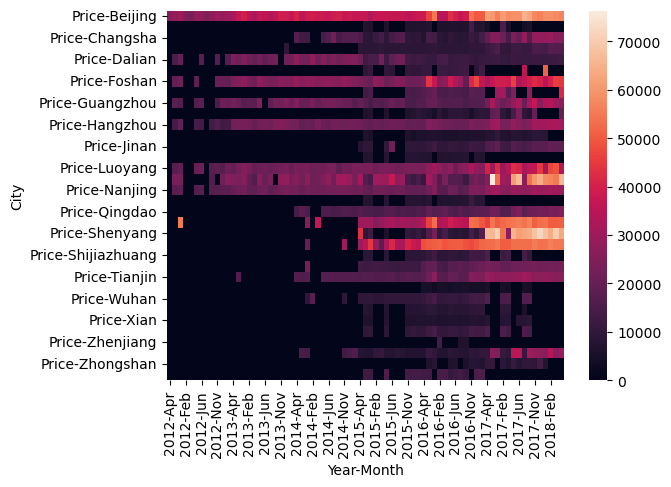

In [15]:
ax = sns.heatmap(df_pivot.T)
ax.set(xlabel="Year-Month", ylabel="City")
plt.show()

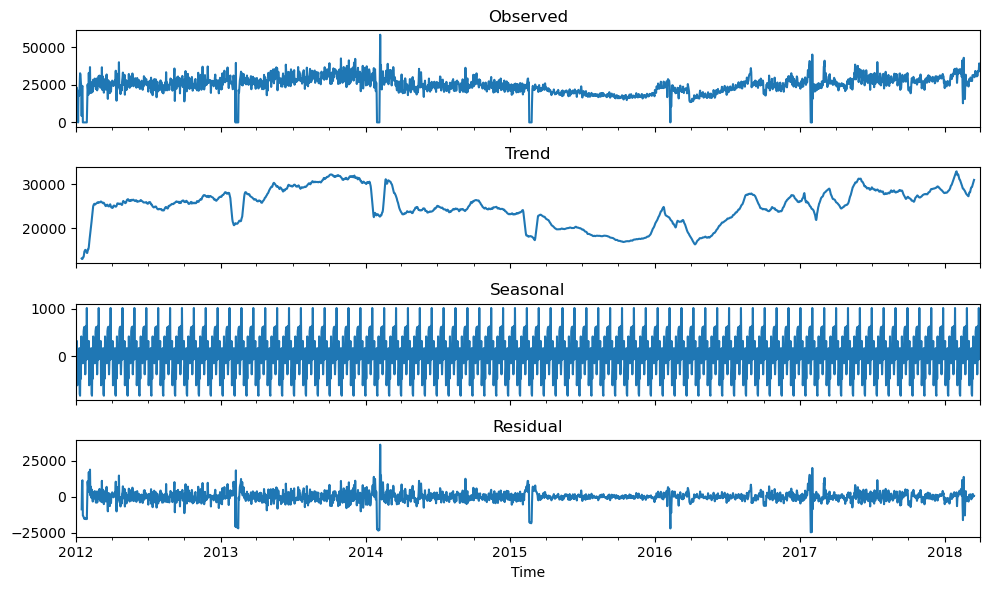

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig, ax = plt.subplots(4, 1, figsize=(10, 6), sharex=True)

df_subset = df[["Time", "Price"]].set_index("Time").resample("1D").mean().sort_index().fillna(0)
# df_subset = df[["Time", "Price"]].set_index("Time").rename(columns={"Price": "data"}).sort_index()
decomp = seasonal_decompose(df_subset, model='additive', period=30)

decomp.observed.plot(ax=ax[0], title="Observed")
decomp.trend.plot(ax=ax[1], title="Trend")
decomp.seasonal.plot(ax=ax[2], title="Seasonal")
decomp.resid.plot(ax=ax[3], title="Residual")

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Count'>

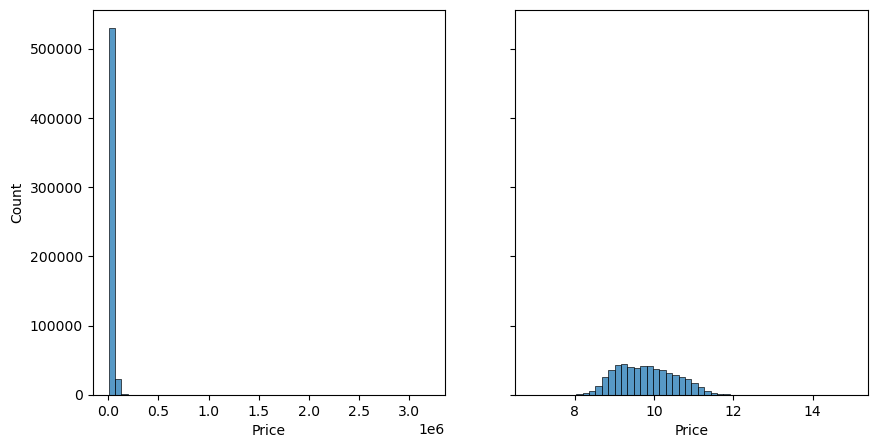

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.histplot(df["Price"], bins=50, ax=ax[0])
sns.histplot(np.log(df["Price"]), bins=50, ax=ax[1])

<AxesSubplot:xlabel='Price', ylabel='Count'>

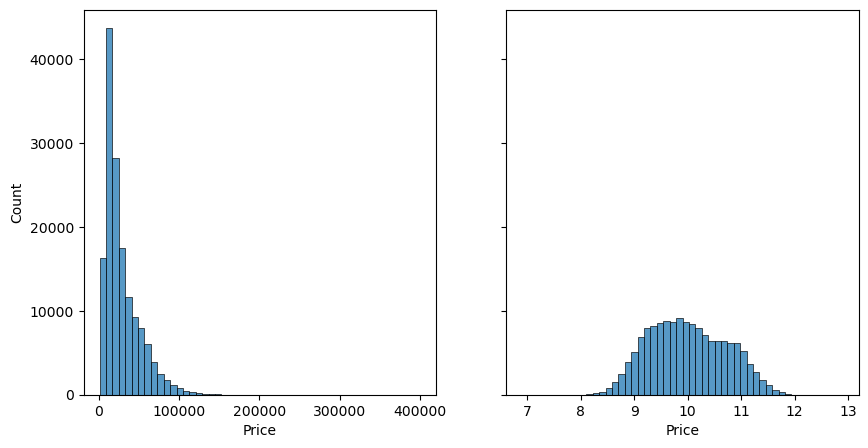

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

df_vis = df[df["Time"] >= "2017-01-01"]
sns.histplot(df_vis["Price"], bins=50, ax=ax[0])
sns.histplot(np.log(df_vis["Price"]), bins=50, ax=ax[1])